<a href="https://colab.research.google.com/github/martinc278/DataScienceProject/blob/master/DataScienceProjet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Extract the data, unzip the data folder

!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
!mkdir data
!unzip -q occupancy_data.zip -d data/
!rm occupancy_data.zip

--2019-12-18 16:10:34--  http://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335713 (328K) [application/x-httpd-php]
Saving to: ‘occupancy_data.zip’

occupancy_data.zip  100%[===================>] 327.84K  1.89MB/s    in 0.2s    

2019-12-18 16:10:39 (1.89 MB/s) - ‘occupancy_data.zip’ saved [335713/335713]



In [0]:
import pandas as pd

data_train = pd.read_csv('data/datatraining.txt')
data_valid = pd.read_csv('data/datatest.txt')
data_test = pd.read_csv('data/datatest2.txt')

print(data_train)

                     date  Temperature  ...  HumidityRatio  Occupancy
1     2015-02-04 17:51:00        23.18  ...       0.004793          1
2     2015-02-04 17:51:59        23.15  ...       0.004783          1
3     2015-02-04 17:53:00        23.15  ...       0.004779          1
4     2015-02-04 17:54:00        23.15  ...       0.004772          1
5     2015-02-04 17:55:00        23.10  ...       0.004757          1
...                   ...          ...  ...            ...        ...
8139  2015-02-10 09:29:00        21.05  ...       0.005579          1
8140  2015-02-10 09:29:59        21.05  ...       0.005563          1
8141  2015-02-10 09:30:59        21.10  ...       0.005596          1
8142  2015-02-10 09:32:00        21.10  ...       0.005621          1
8143  2015-02-10 09:33:00        21.10  ...       0.005612          1

[8143 rows x 7 columns]


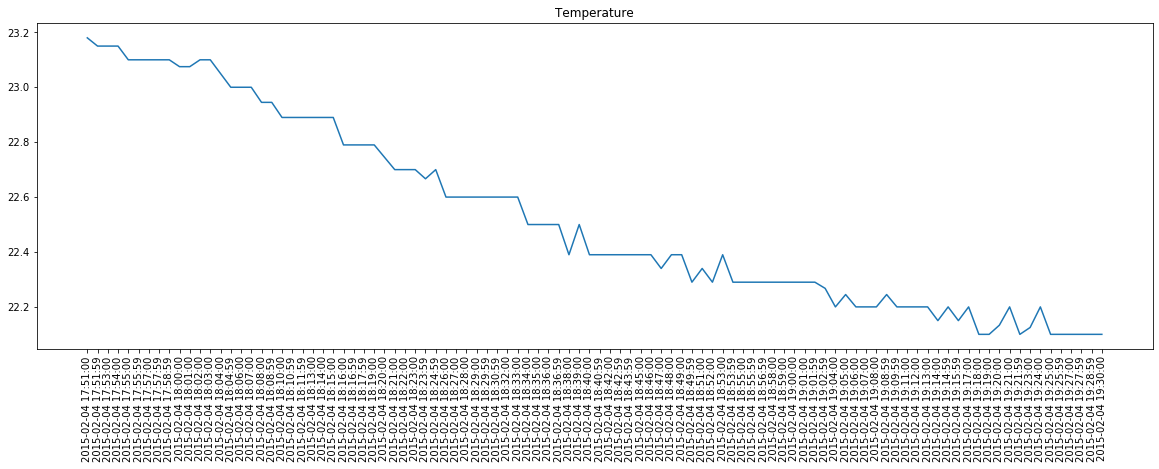

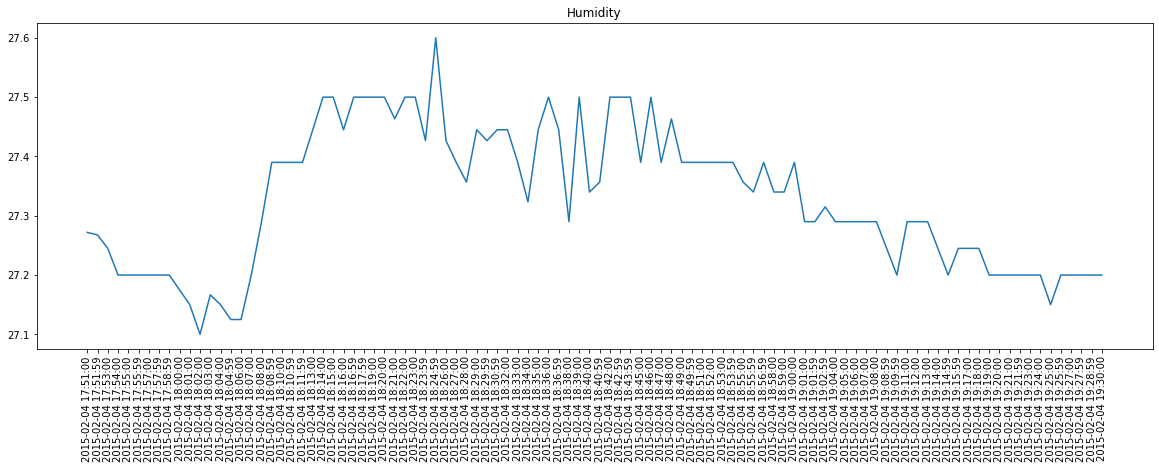

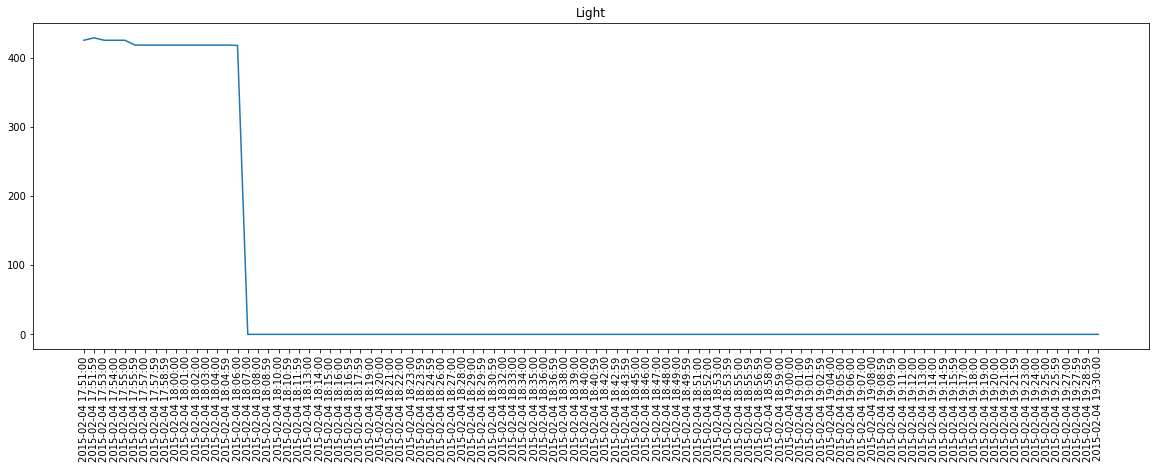

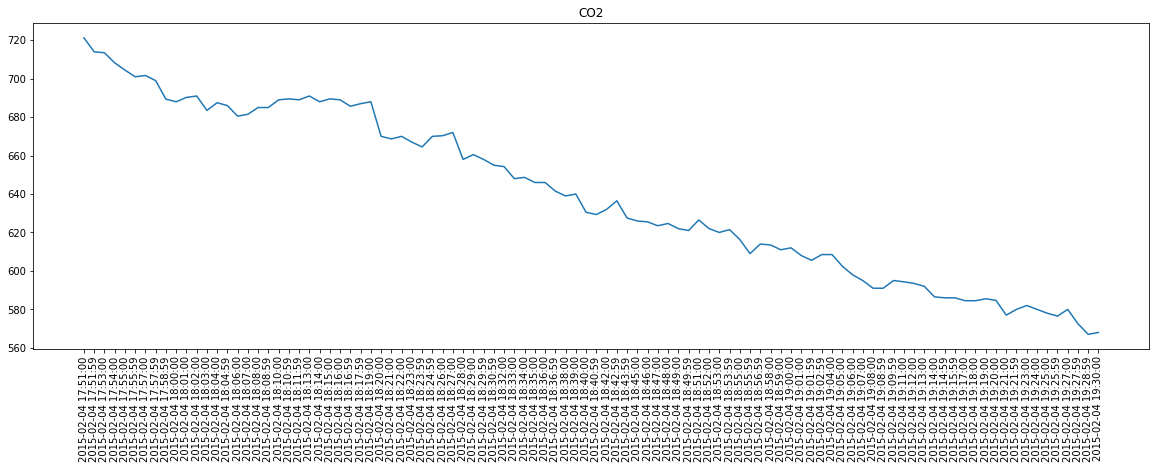

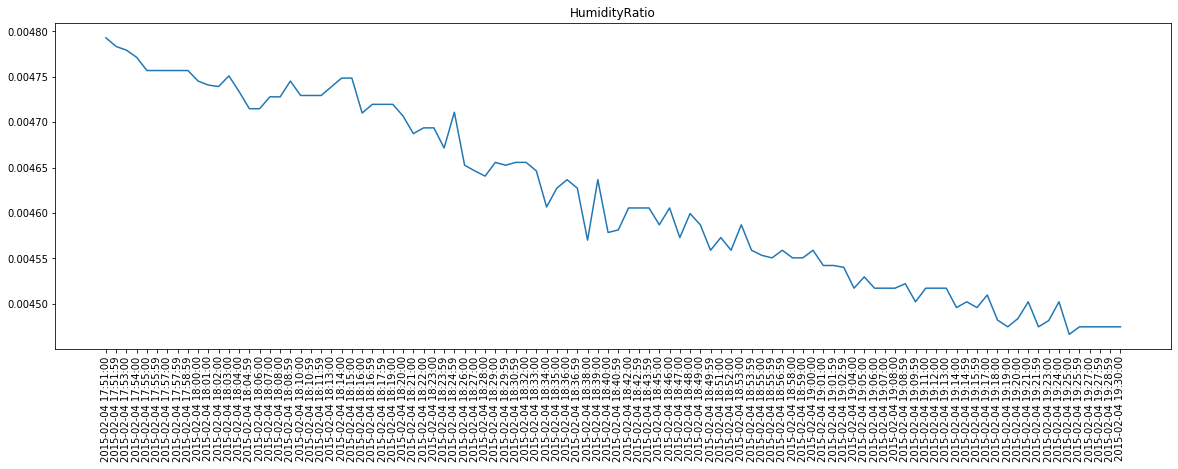

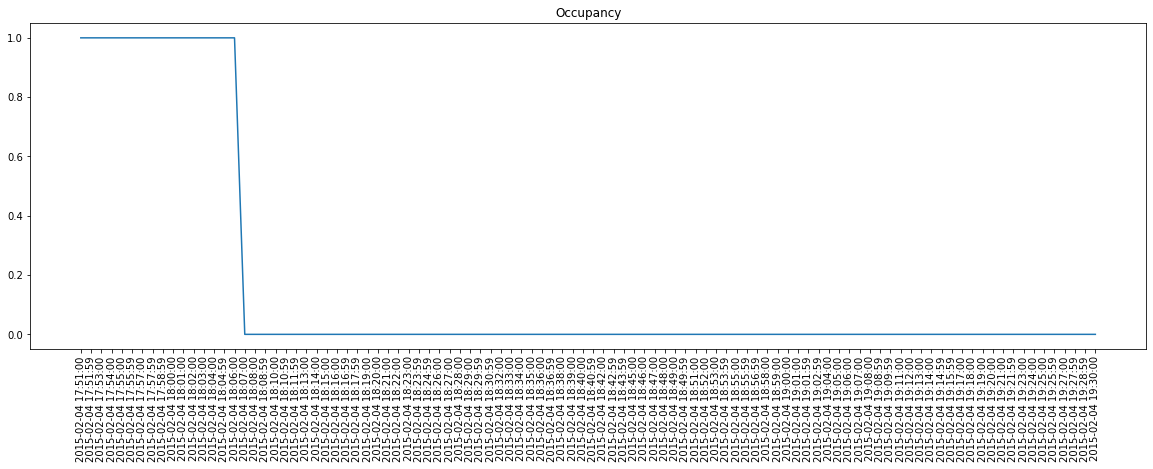

In [0]:
#Let's have a quick look at the data

from matplotlib import pyplot as plt

def plotFigures(feat, data):
  fig = plt.figure(figsize=(20, 6))
  plt.title(feat)
  plt_x, plt_y = data['date'], data[feat]
  plt.plot(plt_x[:100], plt_y[:100])
  plt.xticks(rotation=90)
  fig.show()

plotFigures('Temperature', data_train)
plotFigures('Humidity', data_train)
plotFigures('Light', data_train)
plotFigures('CO2', data_train)
plotFigures('HumidityRatio', data_train)
plotFigures('Occupancy', data_train)

In [0]:
#We are trying to infer about whether or not the room is occupied.

from sklearn.linear_model import LogisticRegression

x, y = data_train[data_train.columns[1:len(data_train.columns)-1]], data_train[data_train.columns[len(data_train.columns)-1]] 
reg = LogisticRegression(solver='lbfgs', max_iter=100000).fit(x, y)
x, y = data_test[data_test.columns[1:len(data_test.columns)-1]], data_test[data_test.columns[len(data_test.columns)-1]] 
print(reg.score(x, y))

0.984208367514356


In [0]:
#Even though the Logistic Regression is good already, let's try with an SVM

from sklearn import svm

x, y = data_train[data_train.columns[1:len(data_train.columns)-1]], data_train[data_train.columns[len(data_train.columns)-1]] 
reg = svm.SVC(kernel='rbf').fit(x, y) 
x, y = data_valid[data_valid.columns[1:len(data_valid.columns)-1]], data_valid[data_valid.columns[len(data_valid.columns)-1]] 
print(reg.score(x, y))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9103189493433396


In [0]:
from tensorflow.python.keras.layers import Input, Dense, Dropout
from tensorflow.python.keras.models import Model

data_train_nn = data_train[data_train.columns[1:len(data_train.columns)-1]]/data_train[data_train.columns[1:len(data_train.columns)-1]].mean()

lin = Input(len(data_train_nn.columns))
lact = lin
lact = Dense(24, activation='relu')(lact)
lact = Dense(16, activation='relu')(lact)
lact = Dense(8, activation='relu')(lact)
lout = Dense(1, activation='sigmoid')(lact)
model = Model(lin, lout)
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 689
Trainable params: 689
Non-trainable params: 0
_________________________________________________________________


In [0]:
data_valid_nn = data_valid[data_valid.columns[1:len(data_valid.columns)-1]]/data_valid[data_valid.columns[1:len(data_valid.columns)-1]].mean()
model.fit(x=data_train_nn, y=data_train[data_train.columns[len(data_train.columns)-1]], batch_size=256, epochs=200, validation_data=(data_valid_nn, data_valid[data_valid.columns[-1]]))

7
Train on 8143 samples, validate on 2665 samples
Epoch 1/200
8143/8143 [==============================] - 1s 62us/sample - loss: 0.4826 - binary_accuracy: 0.8383 - val_loss: 0.3328 - val_binary_accuracy: 0.9786
Epoch 2/200
8143/8143 [==============================] - 0s 8us/sample - loss: 0.1994 - binary_accuracy: 0.9544 - val_loss: 0.2301 - val_binary_accuracy: 0.9227
Epoch 3/200
8143/8143 [==============================] - 0s 8us/sample - loss: 0.1198 - binary_accuracy: 0.9612 - val_loss: 0.2480 - val_binary_accuracy: 0.8510
Epoch 4/200
8143/8143 [==============================] - 0s 9us/sample - loss: 0.0907 - binary_accuracy: 0.9666 - val_loss: 0.3314 - val_binary_accuracy: 0.7565
Epoch 5/200
8143/8143 [==============================] - 0s 8us/sample - loss: 0.0762 - binary_accuracy: 0.9745 - val_loss: 0.4315 - val_binary_accuracy: 0.7370
Epoch 6/200
8143/8143 [==============================] - 0s 8us/sample - loss: 0.0686 - binary_accuracy: 0.9808 - val_loss: 0.4504 - val_binary_